Import packages

In [8]:
# import the necessary packages
import matplotlib.pyplot as plt
import numpy as np # allocating the 2d array the image will be drawn on
import argparse
import cv2
import sys # exit out of script early

Function to display image in notebook

In [9]:
def plt_imshow(title, image):
    # convert BGR to RGB and display
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.title(title)
    plt.grid(False)
    plt.show()

Implement ArUco marker generation

In [10]:
# # construct the argument parser and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-o", "--output", required=True,
# 	help="path to output image containing ArUCo tag")
# ap.add_argument("-i", "--id", type=int, required=True,
# 	help="ID of ArUCo tag to generate")
# ap.add_argument("-t", "--type", type=str,
# 	default="DICT_ARUCO_ORIGINAL",
# 	help="type of ArUCo tag to generate")
# args = vars(ap.parse_args())

# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values
args = {
	"output": "DICT_5X5_100_id24.png",
    "id": 24,
    "type": "DICT_ARUCO_ORIGINAL",
}

# options to try
# type: DICT_5X5_100, DICT_4X4_50
# id: 42, 66, 87, 70
# output: update to relfect <type>_<id>.png

In [11]:
# define names of each possible ArUco tag OpenCV supports
ARUCO_DICT = {
	# 4x4 bits (16 total). store 50 unique ids
	# max ids and size = balanace
	# maps ArUco tag name to opencv unique id for each family
	"DICT_4X4_50": cv2.aruco.DICT_4X4_50,
	"DICT_4X4_100": cv2.aruco.DICT_4X4_100,
	"DICT_4X4_250": cv2.aruco.DICT_4X4_250,
	"DICT_4X4_1000": cv2.aruco.DICT_4X4_1000,
	"DICT_5X5_50": cv2.aruco.DICT_5X5_50,
	"DICT_5X5_100": cv2.aruco.DICT_5X5_100,
	"DICT_5X5_250": cv2.aruco.DICT_5X5_250,
	"DICT_5X5_1000": cv2.aruco.DICT_5X5_1000,
	"DICT_6X6_50": cv2.aruco.DICT_6X6_50,
	"DICT_6X6_100": cv2.aruco.DICT_6X6_100,
	"DICT_6X6_250": cv2.aruco.DICT_6X6_250,
	"DICT_6X6_1000": cv2.aruco.DICT_6X6_1000,
	"DICT_7X7_50": cv2.aruco.DICT_7X7_50,
	"DICT_7X7_100": cv2.aruco.DICT_7X7_100,
	"DICT_7X7_250": cv2.aruco.DICT_7X7_250,
	"DICT_7X7_1000": cv2.aruco.DICT_7X7_1000,
	"DICT_ARUCO_ORIGINAL": cv2.aruco.DICT_ARUCO_ORIGINAL,
	"DICT_APRILTAG_16h5": cv2.aruco.DICT_APRILTAG_16h5,
	"DICT_APRILTAG_25h9": cv2.aruco.DICT_APRILTAG_25h9,
	"DICT_APRILTAG_36h10": cv2.aruco.DICT_APRILTAG_36h10,
	"DICT_APRILTAG_36h11": cv2.aruco.DICT_APRILTAG_36h11
}

In [12]:
# verify that the supplied ArUCo tag exists and is supported by
# OpenCV, else exit
if ARUCO_DICT.get(args["type"], None) is None:
	print("[INFO] ArUCo tag of '{}' is not supported".format(
		args["type"]))
	sys.exit(0)

# load the ArUCo dictionary into a variable
# instructs opencv how to draw the marker, else opencv doesnt know how to draw it
arucoDict = cv2.aruco.Dictionary_get(ARUCO_DICT[args["type"]])

[INFO] generating ArUCo tag type 'DICT_ARUCO_ORIGINAL' with ID '24'


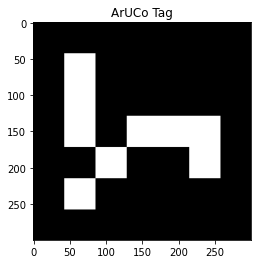

In [13]:
# allocate memory for the output ArUCo tag and then draw the ArUCo
# tag on the output image
print("[INFO] generating ArUCo tag type '{}' with ID '{}'".format(
	args["type"], args["id"]))
# 300 x 300 square image, 1 channel, unsigned bit integer standard for opencv
# 300 is just the resolution needed for your application
tag = np.zeros((300, 300, 1), dtype="uint8")
# draw the marker set above, with the id mapping, size value mapped earlier, canvas tag, 1 bit/cell for padded
# padding ensure contrast between ArUco tag and environment
cv2.aruco.drawMarker(arucoDict, args["id"], 300, tag, 1)

# write the generated ArUCo tag to disk and then display it to our
# screen
cv2.imwrite(args["output"], tag)
plt_imshow("ArUCo Tag", tag)

How to apply this to a computer vision robotics system

if id == 24:
	GO()

if id == 42:
	SLOW()

if id == 70:
	STOP()

if id == 67:
	LEFT()

if id == 78:
	RIGHT()